In [1]:
import os
import glob
import pandas as pd

In [3]:
os.chdir("./TSX_2019")
retval = os.getcwd()
print ("Current working directory ::"+ retval)

Current working directory ::C:\Users\hp\Documents\js\TSX_2019


In [4]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [6]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "Merged.csv", index=False, encoding='utf-8-sig')

In [7]:
data = pd.read_csv("Merged.csv") 
data.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,AAB.TO,01 Jan 2019,0.06,0.06,0.06,0.06,0
1,AAV.TO,01 Jan 2019,1.98,1.98,1.98,1.98,0
2,ABT.TO,01 Jan 2019,7.74,7.74,7.74,7.74,0
3,ABX.TO,01 Jan 2019,18.43,18.43,18.43,18.43,0
4,AC.TO,01 Jan 2019,25.96,25.96,25.96,25.96,0


In [9]:
data['Date'] =  pd.to_datetime(data['Date'], format='%d %b %Y')

In [10]:
data['Date'].head()

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: Date, dtype: datetime64[ns]

In [11]:
data = data.set_index('Date')

In [12]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.weekday_name

In [18]:
data.head()

,Symbol,Open,High,Low,Close,Volume,Year,Month,Weekday Name
Date,,,,,,,,,
2019-01-01,AAB.TO,0.06,0.06,0.06,0.06,0,2019,1,Tuesday
2019-01-01,AAV.TO,1.98,1.98,1.98,1.98,0,2019,1,Tuesday
2019-01-01,ABT.TO,7.74,7.74,7.74,7.74,0,2019,1,Tuesday
2019-01-01,ABX.TO,18.43,18.43,18.43,18.43,0,2019,1,Tuesday
2019-01-01,AC.TO,25.96,25.96,25.96,25.96,0,2019,1,Tuesday


In [16]:
feb = data.loc[data.Month == 2]

In [19]:
feb.head()

,Symbol,Open,High,Low,Close,Volume,Year,Month,Weekday Name
Date,,,,,,,,,
2019-02-01,AAB.TO,0.06,0.06,0.06,0.06,30000,2019,2,Friday
2019-02-01,AAV.TO,2.06,2.14,2.01,2.03,300877,2019,2,Friday
2019-02-01,ABT.TO,8.18,8.31,8.18,8.22,36475,2019,2,Friday
2019-02-01,ABX.TO,17.48,17.57,17.03,17.33,4424908,2019,2,Friday
2019-02-01,AC.TO,29.79,30.48,29.75,30.22,1724608,2019,2,Friday


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

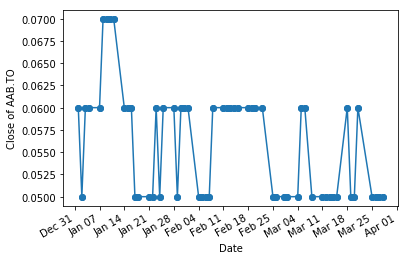

In [65]:
import matplotlib.dates as mdates

AAB=data.loc[data.Symbol == 'AAB.TO']
    
ax = AAB['Close'].plot(marker='o', linestyle='-')
ax.set_ylabel('Close of AAB.TO');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [77]:
data_columns = ['Open', 'Close', 'Volume']
AAB_weekly_mean = AAB[data_columns].resample('W').mean()

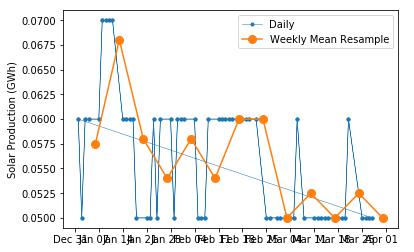

In [81]:
start, end = '2019-01', '2019-03'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(AAB.loc[start:end, 'Open'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(AAB_weekly_mean.loc[start:end, 'Open'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax.legend();